# Total Correlation Experiments

In [2]:
from scipy.stats import norm
from numpy.random import multivariate_normal as mnorm
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np
from math import log

In [3]:
def total_correlation(joint, factorised):
        return log(joint / np.product(factorised), 2)

In [11]:
x = np.linspace(0, 1, 10)
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [13]:
# the Percent point function of the normal distribution
norm.ppf(x)

array([       -inf, -1.22064035, -0.76470967, -0.4307273 , -0.1397103 ,
        0.1397103 ,  0.4307273 ,  0.76470967,  1.22064035,         inf])

In [14]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
x

array([-2.32634787, -2.27935095, -2.23235402, -2.18535709, -2.13836017,
       -2.09136324, -2.04436631, -1.99736939, -1.95037246, -1.90337553,
       -1.85637861, -1.80938168, -1.76238475, -1.71538783, -1.6683909 ,
       -1.62139397, -1.57439705, -1.52740012, -1.48040319, -1.43340627,
       -1.38640934, -1.33941241, -1.29241549, -1.24541856, -1.19842163,
       -1.15142471, -1.10442778, -1.05743085, -1.01043393, -0.963437  ,
       -0.91644007, -0.86944314, -0.82244622, -0.77544929, -0.72845236,
       -0.68145544, -0.63445851, -0.58746158, -0.54046466, -0.49346773,
       -0.4464708 , -0.39947388, -0.35247695, -0.30548002, -0.2584831 ,
       -0.21148617, -0.16448924, -0.11749232, -0.07049539, -0.02349846,
        0.02349846,  0.07049539,  0.11749232,  0.16448924,  0.21148617,
        0.2584831 ,  0.30548002,  0.35247695,  0.39947388,  0.4464708 ,
        0.49346773,  0.54046466,  0.58746158,  0.63445851,  0.68145544,
        0.72845236,  0.77544929,  0.82244622,  0.86944314,  0.91

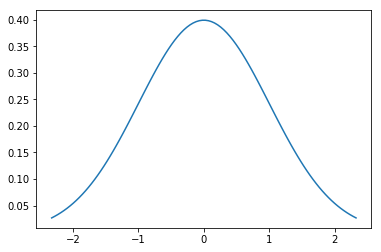

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x), label='frozen pdf')

In [26]:
x = np.linspace(10, 20, 100)
mu, std = norm.fit(x)
print(mu, std)

(15.0, 2.9157646512850626)


In [19]:
x = np.random.rand(100,3)
mu = np.mean(x, axis=0)
cov = np.cov(x.T)

print("Mean vector:\n{0} \n".format(mu))
print("Covariance matrix:\n {0}".format(cov))

[[0.62753774 0.3296832  0.02161906 0.77667858 0.17894451 0.21393735
  0.76751206 0.56748262 0.18792328 0.16123491 0.63474022 0.22193178
  0.14179741 0.34514622 0.96386998 0.91627591 0.32744577 0.33244648
  0.66484063 0.14565518 0.68921155 0.02134903 0.99592818 0.85405699
  0.72639761 0.68891415 0.8746103  0.16842265 0.81675859 0.4887173
  0.18653878 0.62052332 0.72569709 0.34194311 0.57805811 0.59738216
  0.7107564  0.24001468 0.74716032 0.00147068 0.1543645  0.95970258
  0.40684637 0.18772295 0.89302383 0.6431021  0.49860536 0.33765072
  0.14855401 0.0639317  0.97037643 0.36725386 0.58643475 0.23213968
  0.82385613 0.18139685 0.07385455 0.03077549 0.28216216 0.64335453
  0.23673911 0.92218941 0.60650267 0.30477453 0.21556213 0.33126764
  0.2154251  0.31347905 0.9458604  0.766596   0.05238489 0.9746971
  0.12186277 0.99649029 0.72944623 0.0955668  0.62139018 0.65177747
  0.84146187 0.50769541 0.26576689 0.19518831 0.28615488 0.58777581
  0.16256215 0.22044552 0.85091054 0.71625035 0.51

Mean vector:
[-0.04650814  0.07298253] 

Covariance matrix:
 [[ 0.94503389 -0.07498384]
 [-0.07498384 10.45792716]]


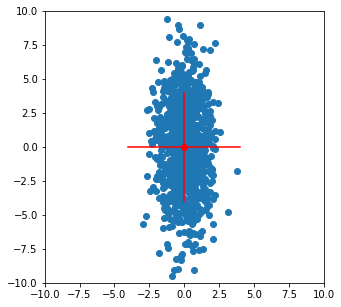

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

# define a normal distribution and sample from it
mean_diag = np.array([0, 0])
cov_diag = np.array([[1, 0], [0, 10]]) 
x,y = mnorm(mean_diag, cov_diag, 1000).T

mu = np.mean([x,y], axis=1)
cov = np.cov([x,y])

print("Mean vector:\n{0} \n".format(mu))
print("Covariance matrix:\n {0}".format(cov))

# plot the samples
ax.plot(x, y, 'o')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

# plot origin + major axes
ax.plot(0,0,'ro')
ax.plot([-4,4], [0,0], 'r')
ax.plot([0,0], [-4,4], 'r')

fig.savefig("diagonal_normal")

Mean vector:
[-0.03084242 -0.06906162] 

Covariance matrix:
 [[ 0.92010114 -0.00106627]
 [-0.00106627  1.02749561]]


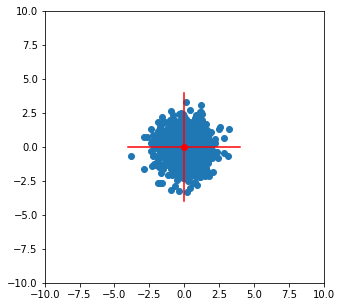

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

# define a normal distribution and sample from it
mean_spherical = np.array([0, 0])
cov_spherical = np.array([[1, 0], [0, 1]]) 
x,y = mnorm(mean_spherical, cov_spherical, 1000).T

mu = np.mean([x,y], axis=1)
cov = np.cov([x,y])

print("Mean vector:\n{0} \n".format(mu))
print("Covariance matrix:\n {0}".format(cov))

# plot the samples
ax.plot(x, y, 'o')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

# plot origin + major axes
ax.plot(0,0,'ro')
ax.plot([-4,4], [0,0], 'r')
ax.plot([0,0], [-4,4], 'r')

fig.savefig("spherical_normal")

In [14]:
x = [0,0]

p_diag = multivariate_normal.pdf(x, mean=mean_diag, cov=cov_diag)
print("Joint PDF of the diagonal normal: {0}".format(p_diag))
p_diag_1 = multivariate_normal.pdf(x[0], mean=mean_diag[0], cov=cov_diag[0,0])
p_diag_2 = multivariate_normal.pdf(x[1], mean=mean_diag[1], cov=cov_diag[1,1])
print("Factorised PDF (dim 1) of the diagonal normal: {0}".format(p_diag_1))
print("Factorised PDF (dim 2) of the diagonal normal: {0}".format(p_diag_2))
print("Product of Factorised PDFs of the diagonal normal: {0}".format(p_diag_1 * p_diag_2))
print("Total Correlation for diagonal normal: {0}".format(total_correlation(p_diag, np.array([p_diag_1, p_diag_2]))))

print("\n")

p_spherical = multivariate_normal.pdf(x, mean=mean_spherical, cov=cov_spherical)
print("Joint PDF of the spherical normal: {0}".format(p_spherical))
p_spherical_1 = multivariate_normal.pdf(x[0], mean=mean_spherical[0], cov=cov_spherical[0,0])
p_spherical_2 = multivariate_normal.pdf(x[1], mean=mean_spherical[1], cov=cov_spherical[1,1])
print("Factorised PDF (dim 1) of the spherical normal: {0}".format(p_spherical_1))
print("Factorised PDF (dim 2) of the spherical normal: {0}".format(p_spherical_2))
print("Product of Factorised PDFs of the spherical normal: {0}".format(p_spherical_1 * p_spherical_2))
print("Total Correlation for spherical normal: {0}".format(total_correlation(p_spherical, np.array([p_spherical_1, p_spherical_2]))))

Joint PDF of the diagonal normal: 0.0503292121045
Factorised PDF (dim 1) of the diagonal normal: 0.398942280401
Factorised PDF (dim 2) of the diagonal normal: 0.126156626101
Product of Factorised PDFs of the diagonal normal: 0.0503292121045
Total Correlation for diagonal normal: 0.0


Joint PDF of the spherical normal: 0.159154943092
Factorised PDF (dim 1) of the spherical normal: 0.398942280401
Factorised PDF (dim 2) of the spherical normal: 0.398942280401
Product of Factorised PDFs of the spherical normal: 0.159154943092
Total Correlation for spherical normal: 0.0


[1 2 3 4 5 6 7 8 9]
362880
